📤 Please upload your 'processed_data.csv' file...


Saving processed_data.csv to processed_data (2).csv

✅ Data loaded successfully!
Columns in dataset: ['Timestamp', 'Solar_Power_kW', 'Wind_Power_kW', 'Grid_Power_kW', 'Battery_SoC_%', 'SC_Charge_kW', 'Hydrogen_Production_kg/h', 'Load_Demand_kW', 'Power_Supplied_kW', 'Power_Loss_kW', 'Optimization_Level']

⚠️ Dropping non-numeric columns: ['Timestamp', 'Optimization_Level']

🎯 Automatically selected target column: 'Power_Loss_kW'

📊 Data Split Complete — Train: 800, Test: 200

✅ Model training completed!

📈 Model Performance Metrics:
R² Score       : 0.5345
Mean Abs Error : 0.6088
Root MSE       : 0.7218


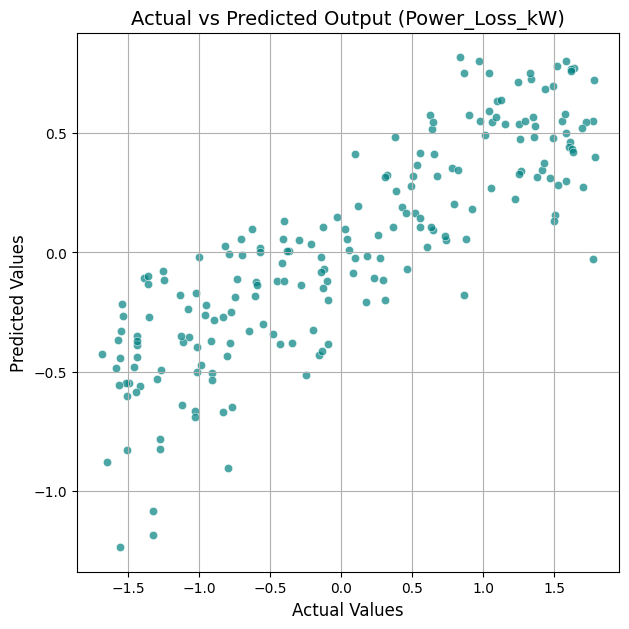

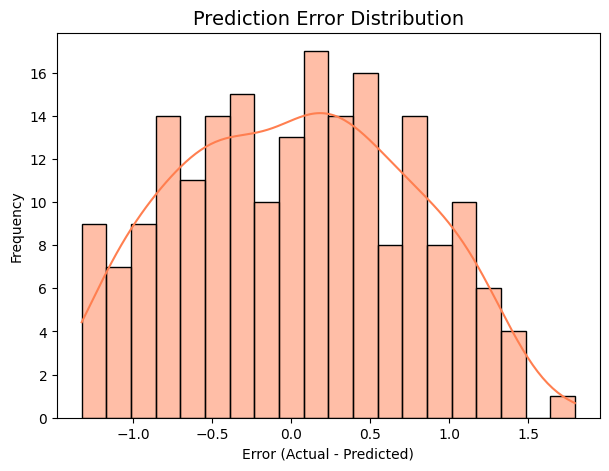

/tmp/ipython-input-174171803.py:95: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances.values, y=importances.index, palette="viridis")


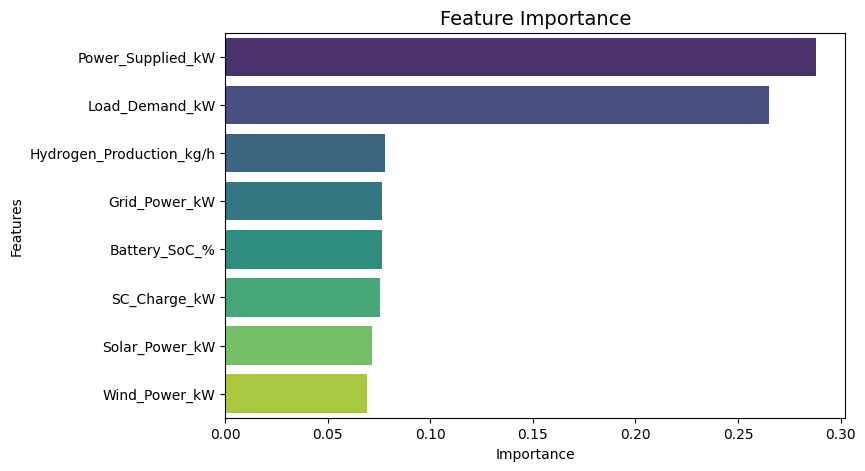


💾 Predictions saved as 'week2_predictions.csv'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


💾 Trained model saved as 'trained_model_week2.pkl'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [3]:
# =====================================================
# WEEK 2 - MODEL TRAINING, PREDICTION & VISUALIZATION
# =====================================================

# 1️⃣ Install dependencies
!pip install pandas numpy scikit-learn matplotlib seaborn

# 2️⃣ Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# 3️⃣ Upload processed data
print("📤 Please upload your 'processed_data.csv' file...")
uploaded = files.upload()

for filename in uploaded.keys():
    data_path = filename

# 4️⃣ Load dataset
data = pd.read_csv(data_path)
print("\n✅ Data loaded successfully!")
print("Columns in dataset:", list(data.columns))

# 5️⃣ Drop non-numeric columns (like timestamps or strings)
non_numeric = data.select_dtypes(exclude=np.number).columns
if len(non_numeric) > 0:
    print(f"\n⚠️ Dropping non-numeric columns: {list(non_numeric)}")
    data = data.drop(columns=non_numeric)

# 6️⃣ Ensure enough numeric columns exist
numeric_cols = data.select_dtypes(include=np.number).columns.tolist()
if len(numeric_cols) < 2:
    raise ValueError("❌ Not enough numeric columns to train the model!")

# 7️⃣ Automatically select target column (last numeric column)
target_column = numeric_cols[-1]
print(f"\n🎯 Automatically selected target column: '{target_column}'")

# 8️⃣ Split dataset
X = data.drop(columns=[target_column])
y = data[target_column]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print(f"\n📊 Data Split Complete — Train: {len(X_train)}, Test: {len(X_test)}")

# 9️⃣ Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
print("\n✅ Model training completed!")

# 🔟 Predict output
y_pred = model.predict(X_test)

# 1️⃣1️⃣ Evaluate model performance
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("\n📈 Model Performance Metrics:")
print(f"R² Score       : {r2:.4f}")
print(f"Mean Abs Error : {mae:.4f}")
print(f"Root MSE       : {rmse:.4f}")

# 1️⃣2️⃣ Visualization - Actual vs Predicted
plt.figure(figsize=(7,7))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7, color='teal')
plt.xlabel("Actual Values", fontsize=12)
plt.ylabel("Predicted Values", fontsize=12)
plt.title(f"Actual vs Predicted Output ({target_column})", fontsize=14)
plt.grid(True)
plt.show()

# 1️⃣3️⃣ Visualization - Error Distribution
errors = y_test - y_pred
plt.figure(figsize=(7,5))
sns.histplot(errors, bins=20, kde=True, color='coral')
plt.title("Prediction Error Distribution", fontsize=14)
plt.xlabel("Error (Actual - Predicted)")
plt.ylabel("Frequency")
plt.show()

# 1️⃣4️⃣ Visualization - Feature Importance
importances = pd.Series(model.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=importances.values, y=importances.index, palette="viridis")
plt.title("Feature Importance", fontsize=14)
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

# 1️⃣5️⃣ Save and download predictions
results = pd.DataFrame({"Actual": y_test.values, "Predicted": y_pred})
results.to_csv("week2_predictions.csv", index=False)
print("\n💾 Predictions saved as 'week2_predictions.csv'")
files.download("week2_predictions.csv")

# 1️⃣6️⃣ Save trained model (optional)
import joblib
joblib.dump(model, "trained_model_week2.pkl")
print("\n💾 Trained model saved as 'trained_model_week2.pkl'")
files.download("trained_model_week2.pkl")
